In [8]:
from PIL import Image
import scipy as sp
import torch
import numpy as np
import skimage.graph
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

(360,)
(360,)
1.0


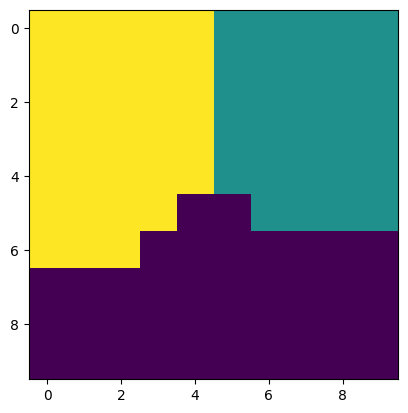

In [30]:
SIGMA = 0.6

""" Image Preprocessing
Our goal here is to create the affinity matrix.
"""
image = Image.open('/content/test_image4.jpg').convert('RGB')
width, height = image.size

# Create an adjacency matrix of a graph where nodes are pixels
# It only considers top/bottom/left/right pixels as a neighbor
# Edge weight between i and j is exp(-||x[i] - x[j]||^2/(sigma^2)).
# for i!=j, and I(i) for i=j

def func(x, y, z):
    print(x.shape)
    print(y.shape)
    return np.exp(-np.abs(x/256 - y/256)**2 / (SIGMA**2))

mask = np.ones(image.size).astype(bool)
adjacency_matrix, _ = skimage.graph.pixel_graph(np.array(image),
                                                mask=mask,
                                                edge_function = func)

print(adjacency_matrix.max())


"""
Spectral Clustering
"""

# Create a spectral clustering object
spec = SpectralClustering(n_clusters=3, affinity='precomputed')

# Perform spectral clustering
spec.fit(adjacency_matrix)

# Construct label image
label_image = spec.labels_.reshape(width, height)

# Display the label image
plt.imshow(label_image)
plt.show()